## WEB SCRAPING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2019.QTR1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2019.QTR2.csv")
df = df1.append(df2, ignore_index=True)
df

,symbol,cik,form,access_number,filed_date,accepted_date,report_url,filing_url
0,NICK,1000045,10-Q,0001193125-19-039489,2019-02-14,2019-02-14 09:02:02,https://www.sec.gov/Archives/edgar/data/100004...,https://www.sec.gov/Archives/edgar/data/100004...
1,NICK,1000045,4,0001357521-19-000001,2019-01-15,2019-01-15 17:56:24,https://www.sec.gov/Archives/edgar/data/100004...,https://www.sec.gov/Archives/edgar/data/100004...
2,NICK,1000045,4,0001357521-19-000002,2019-02-19,2019-02-19 09:14:31,https://www.sec.gov/Archives/edgar/data/100004...,https://www.sec.gov/Archives/edgar/data/100004...
3,NICK,1000045,4,0001357521-19-000003,2019-03-15,2019-03-15 16:43:06,https://www.sec.gov/Archives/edgar/data/100004...,https://www.sec.gov/Archives/edgar/data/100004...
4,NICK,1000045,8-K,0001193125-19-024617,2019-02-01,2019-02-01 06:31:07,https://www.sec.gov/Archives/edgar/data/100004...,https://www.sec.gov/Archives/edgar/data/100004...
...,...,...,...,...,...,...,...,...
519025,B,9984,4,0000009984-19-000061,2019-06-12,2019-06-12 14:21:30,https://www.sec.gov/Archives/edgar/data/9984/0...,https://www.sec.gov/Archives/edgar/data/172495...
519026,B,9984,8-K/A,0001206774-19-001666,2019-05-07,2019-05-07 16:44:15,https://www.sec.gov/Archives/edgar/data/9984/0...,https://www.sec.gov/Archives/edgar/data/9984/0...
519027,B,9984,8-K,0000009984-19-000050,2019-04-26,2019-04-26 06:33:07,https://www.sec.gov/Archives/edgar/data/9984/0...,https://www.sec.gov/Archives/edgar/data/9984/0...
519028,B,9984,8-K,0001206774-19-001652,2019-05-06,2019-05-06 16:17:08,https://www.sec.gov/Archives/edgar/data/9984/0...,https://www.sec.gov/Archives/edgar/data/9984/0...


In [ ]:
#filter 8-K forms
df = df[df["form"]== "8-K"]
df =df.reset_index(drop=True)
df

,symbol,cik,form,access_number,filed_date,accepted_date,report_url,filing_url
0,NICK,1000045,8-K,0001193125-19-024617,2019-02-01,2019-02-01 06:31:07,https://www.sec.gov/Archives/edgar/data/100004...,https://www.sec.gov/Archives/edgar/data/100004...
1,MFIN,1000209,8-K,0001193125-19-004285,2019-01-08,2019-01-08 09:10:35,https://www.sec.gov/Archives/edgar/data/100020...,https://www.sec.gov/Archives/edgar/data/100020...
2,MFIN,1000209,8-K,0001193125-19-007413,2019-01-11,2019-01-11 16:32:03,https://www.sec.gov/Archives/edgar/data/100020...,https://www.sec.gov/Archives/edgar/data/100020...
3,MFIN,1000209,8-K,0001193125-19-024926,2019-02-01,2019-02-01 08:50:35,https://www.sec.gov/Archives/edgar/data/100020...,https://www.sec.gov/Archives/edgar/data/100020...
4,MFIN,1000209,8-K,0001193125-19-047009,2019-02-21,2019-02-21 16:13:02,https://www.sec.gov/Archives/edgar/data/100020...,https://www.sec.gov/Archives/edgar/data/100020...
...,...,...,...,...,...,...,...,...
33287,TRN,99780,8-K,0000099780-19-000054,2019-04-25,2019-04-25 16:13:53,https://www.sec.gov/Archives/edgar/data/99780/...,https://www.sec.gov/Archives/edgar/data/99780/...
33288,TRN,99780,8-K,0000099780-19-000056,2019-05-07,2019-05-07 16:14:53,https://www.sec.gov/Archives/edgar/data/99780/...,https://www.sec.gov/Archives/edgar/data/99780/...
33289,TRN,99780,8-K,0000099780-19-000077,2019-05-09,2019-05-09 16:13:04,https://www.sec.gov/Archives/edgar/data/99780/...,https://www.sec.gov/Archives/edgar/data/99780/...
33290,B,9984,8-K,0000009984-19-000050,2019-04-26,2019-04-26 06:33:07,https://www.sec.gov/Archives/edgar/data/9984/0...,https://www.sec.gov/Archives/edgar/data/9984/0...


In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# for ElementNotInteractableException 
chrome_options.add_argument("window-size=1200x600")


user_agent = 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.50 Safari/537.36'
chrome_options.add_argument(f'user-agent={user_agent}')


wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

     |████████████████████████████████| 911kB 14.8MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InReleas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: use options instead of chrome_options


In [ ]:
url = df.report_url.iloc[0]
url

'https://www.sec.gov/Archives/edgar/data/1000045/000156459020049109/nick-8k_20201030.htm'

In [ ]:
wd.get(url)

In [ ]:
a = wd.find_element_by_xpath("//body").text
a

'8-K 1 nick-8k_20201030.htm 8-K\n  UNITED STATES\nSECURITIES AND EXCHANGE COMMISSION\nWashington, DC 20549\n  FORM 8-K\n  CURRENT REPORT\nPURSUANT TO SECTION 13 OR 15(d)\nOF THE SECURITIES EXCHANGE ACT OF 1934\nDate of Report (Date of earliest event reported) October 30, 2020\n  NICHOLAS FINANCIAL, INC.\n(Exact name of registrant as specified in its Charter)\n              British Columbia, Canada\n  0-26680\n  59-2506879\n(State or Other Jurisdiction of\nIncorporation or Organization)\n  (Commission\nFile Number)\n  (I.R.S. Employer\nIdentification No.)\n  2454 McMullen Booth Road, Building C\nClearwater, Florida\n    33759\n(Address of Principal Executive Offices)\n    (Zip Code)\n(727) 726-0763\n(Registrant’s telephone number, Including area code)\nNot applicable\n(Former name, former address and former fiscal year, if changed since last report)\n  Check the appropriate box below if the Form 8-K filing is intended to simultaneously satisfy the filing obligation of the registrant und

In [ ]:
for i in range(len(df)):
  wd.get(df.report_url.iloc[i])
  text = wd.find_element_by_xpath("//body").text
  time.sleep(2)
  df.loc[i, "string"] = text
  if i% 1000 == 0:
    print(i)
    df.to_pickle("/content/drive/MyDrive/Colab Notebooks/texts.pkl")

df.to_pickle("/content/drive/MyDrive/Colab Notebooks/texts.pkl")

In [ ]:
for i in range(20):
  print(df.string[i])
  print("--------------")


**TIP:** This training could take several hours depending on how many iterations you chose in the .cfg file. You will want to let this run as you sleep or go to work for the day, etc. However, Colab Cloud Service kicks you off it's VMs if you are idle for too long (30-90 mins).

To avoid this hold (CTRL + SHIFT + i) at the same time to open up the inspector view on your browser.

Paste the following code into your console window and hit **Enter**
```
function ClickConnect(){
console.log("Working"); 
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click() 
}
setInterval(ClickConnect,60000)
```
Looks like this, it will click the screen every 10 minutes so that you don't get kicked off for being idle! HACKS!

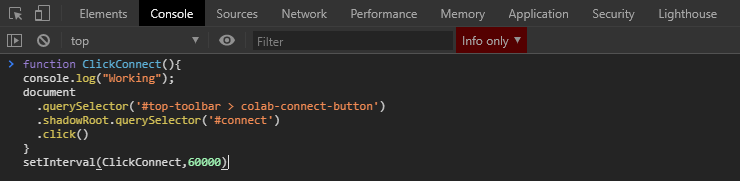